In [46]:
import numpy as np
from label import TNGData

from h5py import File as hf
from pathlib import Path as Path

import matplotlib.pyplot as plt
from plotly import graph_objects as go
from plotly.subplots import make_subplots

In [47]:
dp = Path("/home/group10/deephalo_gnn/TNG50-4-Dark")

In [48]:
t504d = TNGData(dp)
hid = 60

In [49]:
shids_hid = t504d.shids_in_hid(hid)
shids_hid

array([2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709])

In [50]:
t504d.load_halo(hid).shape

(18709, 7)

In [51]:
halo_arr = t504d.load_raw_halo(hid)
tar = np.zeros(halo_arr.shape[0], dtype=float)
to_mask, fg_end = t504d.get_mask(hid, anom_thresh=0.5)
tar[:to_mask] = -1.
tar[fg_end:] = -1.
sum_shid = 0
cnt = 1.
for i in shids_hid[:]:
    sum_shid += t504d.load_raw_subhalo(i).shape[0]
    if to_mask == sum_shid:
        break
# print(sum_shid, i)
for j in range(len(shids_hid)):
    if shids_hid[j-1] == i:
        break
for shid in shids_hid[j:-1]:
    subhalo = t504d.load_raw_subhalo(shid)
    tar[sum_shid:sum_shid+subhalo.shape[0]] = cnt
    cnt+=1.
    sum_shid += subhalo.shape[0]
halopartinfo = t504d.load_raw_subhalo(shids_hid[0])
for i in shids_hid[1:]:
    halopartinfo = np.row_stack((halopartinfo,t504d.load_raw_subhalo(i)))
halopartinfo = np.column_stack((halopartinfo, tar))


In [52]:
halopartinfo.shape

(18709, 8)

In [53]:
np.unique(halopartinfo[:, -1], return_counts=True)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 array([18097,    27,   265,    97,    82,    41,    39,    34,    27]))

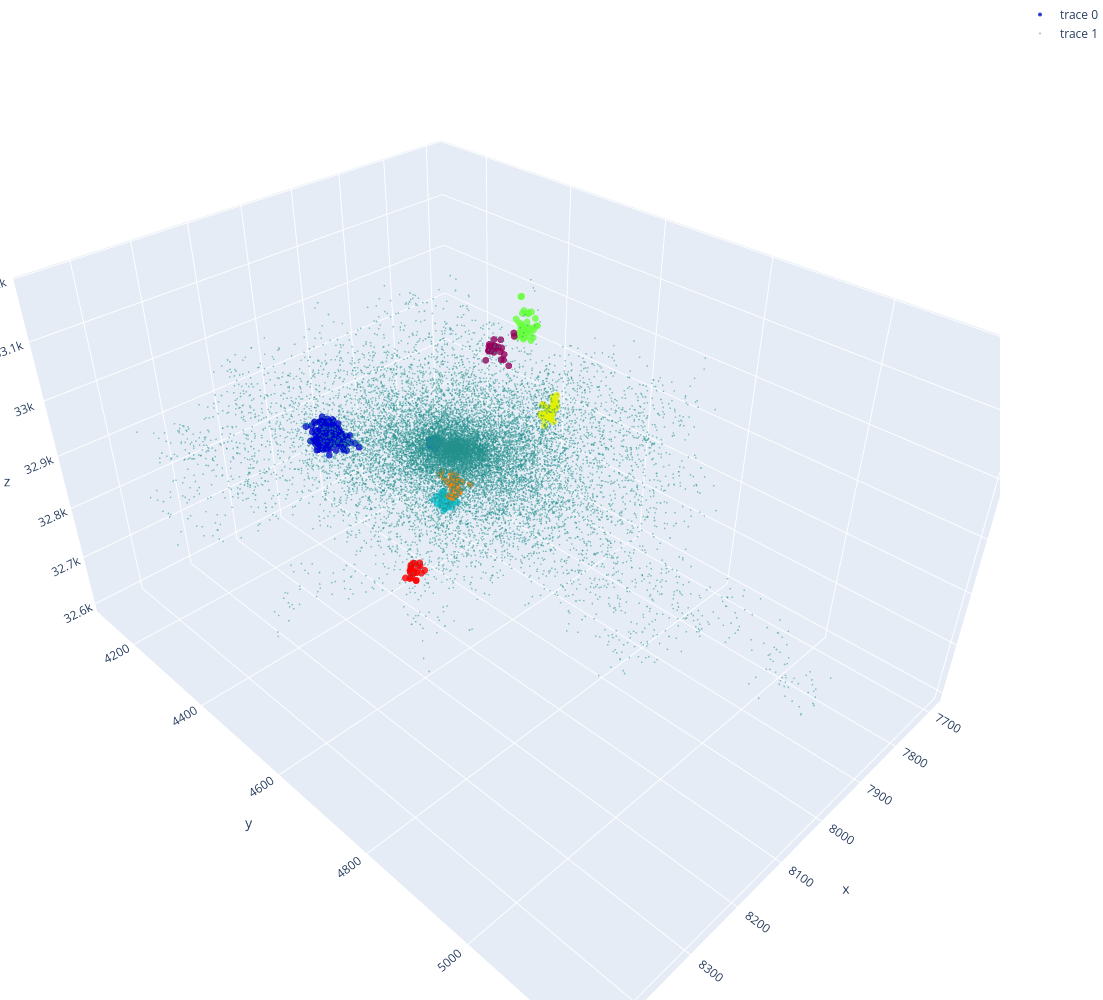

In [80]:
s = label != -1
s0 = label == -1

x = halopartinfo[:, 0]
y = halopartinfo[:, 1]
z = halopartinfo[:, 2]
label = halopartinfo[:, -1]
# print(x.shape)

fig = go.Figure(data=[go.Scatter3d(
    x=x[s],
    y=y[s],
    z=z[s],
    mode='markers',
    marker=dict(
        size=4,
        color=label[s],
        colorscale='Rainbow',
        opacity=0.8
    )
),
                      go.Scatter3d(
    x=x[s0],
    y=y[s0],
    z=z[s0],
    mode='markers',
    marker=dict(
        size=1,
        color=label[s0],
        colorscale='Viridis',
        opacity=0.5
    )
)
])

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), width=1200, height=1000)
# fig.show()